In [272]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [274]:
df = pd.read_csv('budget_dataset.csv', parse_dates=['Date'], index_col='Date')

In [276]:
categories = df.columns

In [278]:
models_dict = {}

In [280]:
best_params_dict = {}

In [282]:
hyperparameters_dict = {
    'Education': (2,1,5),
    'Medical': (2,1,5),
    'Food': (2,1,2),
    'Entertainment': (2,0,5),
    'Transport': (2,1,2),
    'Personal care': (2,1,2),
    'Housing/Bills': (2,1,2),
    'Other': (2,1,2),
}

In [284]:
forecast_steps = 7

In [286]:
aggregation_frequency = 'W'

Training ARIMA model for category: Food
Predicted values for the next 7 days (Food):
2023-07-16    714.320269
2023-07-23    812.785040
2023-07-30    876.441070
2023-08-06    902.440686
2023-08-13    925.832859
2023-08-20    929.837483
2023-08-27    940.844835
Freq: W-SUN, Name: predicted_mean, dtype: float64


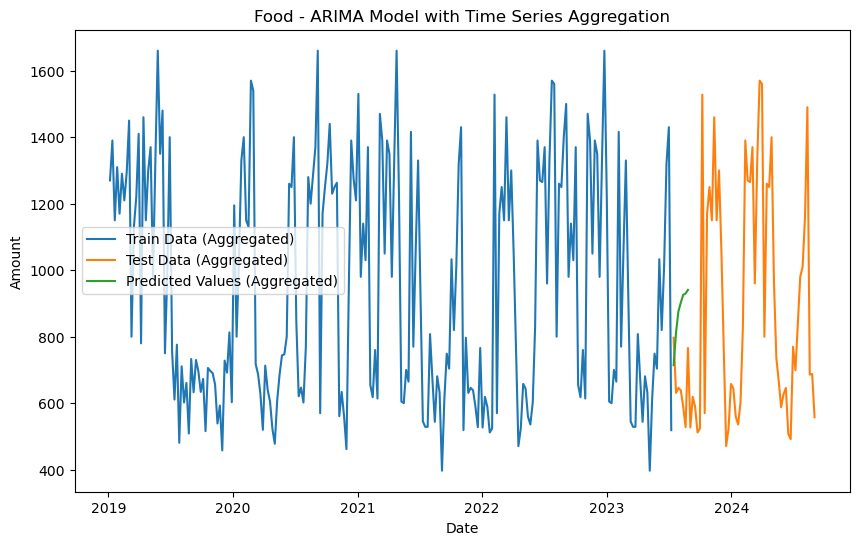

Training ARIMA model for category: Personal care
Predicted values for the next 7 days (Personal care):
2023-07-16     95.782937
2023-07-23    173.357451
2023-07-30    110.486724
2023-08-06    160.063945
2023-08-13    121.244246
2023-08-20    151.584263
2023-08-27    127.883297
Freq: W-SUN, Name: predicted_mean, dtype: float64


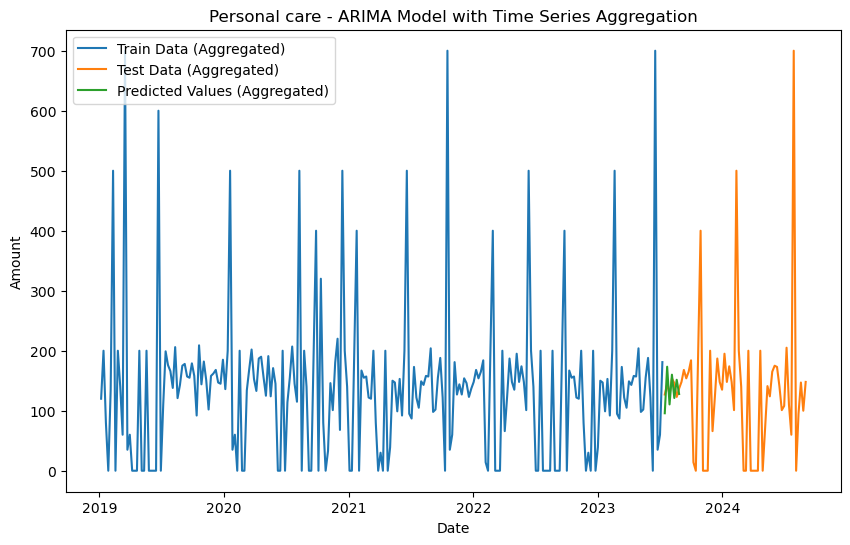

Training ARIMA model for category: Housing/Bills


F:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted values for the next 7 days (Housing/Bills):
2023-07-16    1427.324154
2023-07-23     976.682728
2023-07-30     748.118907
2023-08-06     850.498950
2023-08-13     929.409637
2023-08-20     909.485532
2023-08-27     884.148214
Freq: W-SUN, Name: predicted_mean, dtype: float64


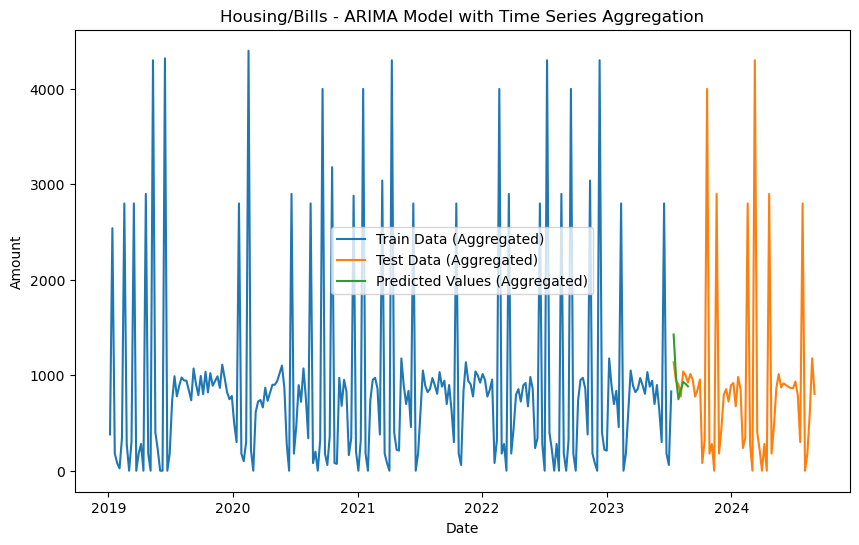

Training ARIMA model for category: Transport


F:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted values for the next 7 days (Transport):
2023-07-16    286.194855
2023-07-23    249.014090
2023-07-30    283.282022
2023-08-06    249.562774
2023-08-13    282.475532
2023-08-20    250.318809
2023-08-27    281.733191
Freq: W-SUN, Name: predicted_mean, dtype: float64


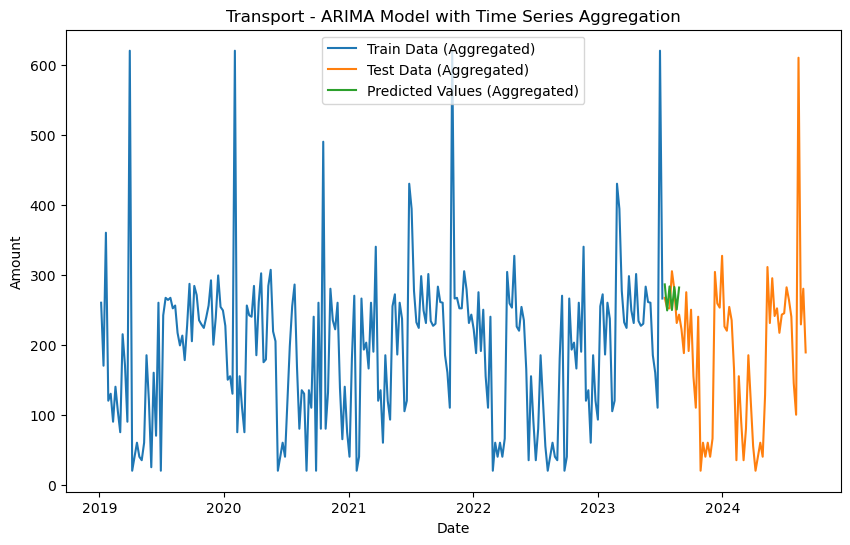

Training ARIMA model for category: Entertainment


F:\Programs\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted values for the next 7 days (Entertainment):
2023-07-16    324.148797
2023-07-23    199.692580
2023-07-30    360.404782
2023-08-06    308.235199
2023-08-13    226.049702
2023-08-20    389.773507
2023-08-27    235.515022
Freq: W-SUN, Name: predicted_mean, dtype: float64


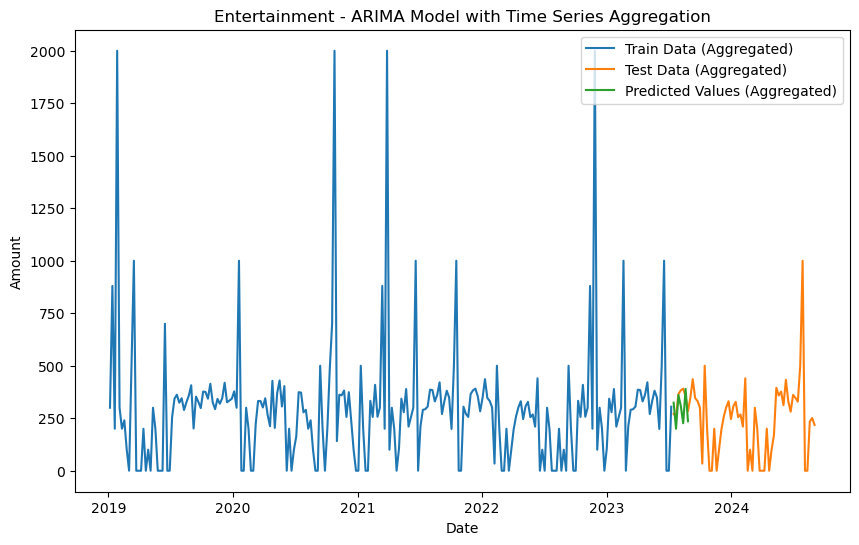

Training ARIMA model for category: Medical


F:\Programs\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Predicted values for the next 7 days (Medical):
2023-07-16    196.256826
2023-07-23    147.863436
2023-07-30    133.491707
2023-08-06    166.012363
2023-08-13    120.341141
2023-08-20    157.383282
2023-08-27    146.548772
Freq: W-SUN, Name: predicted_mean, dtype: float64


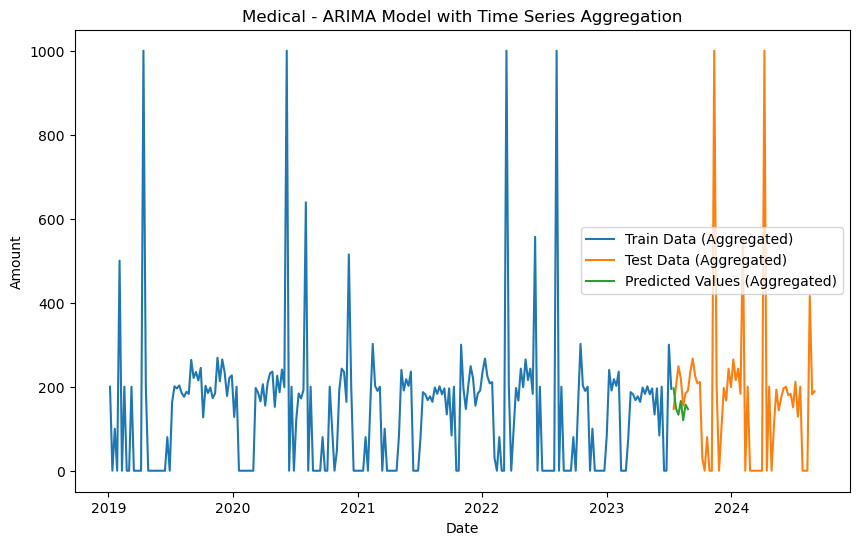

Training ARIMA model for category: Education


F:\Programs\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Predicted values for the next 7 days (Education):
2023-07-16    304.781550
2023-07-23    463.449725
2023-07-30    432.386659
2023-08-06    324.785772
2023-08-13    504.060873
2023-08-20    360.288611
2023-08-27    386.457957
Freq: W-SUN, Name: predicted_mean, dtype: float64


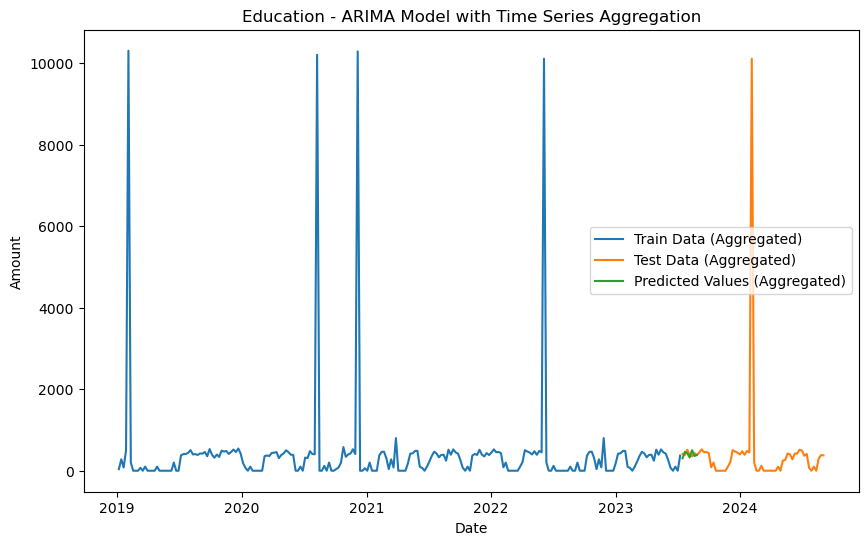

Training ARIMA model for category: Other
Predicted values for the next 7 days (Other):
2023-07-16    366.891353
2023-07-23    307.177607
2023-07-30    271.729296
2023-08-06    240.399168
2023-08-13    224.047800
2023-08-20    207.118769
2023-08-27    200.117534
Freq: W-SUN, Name: predicted_mean, dtype: float64


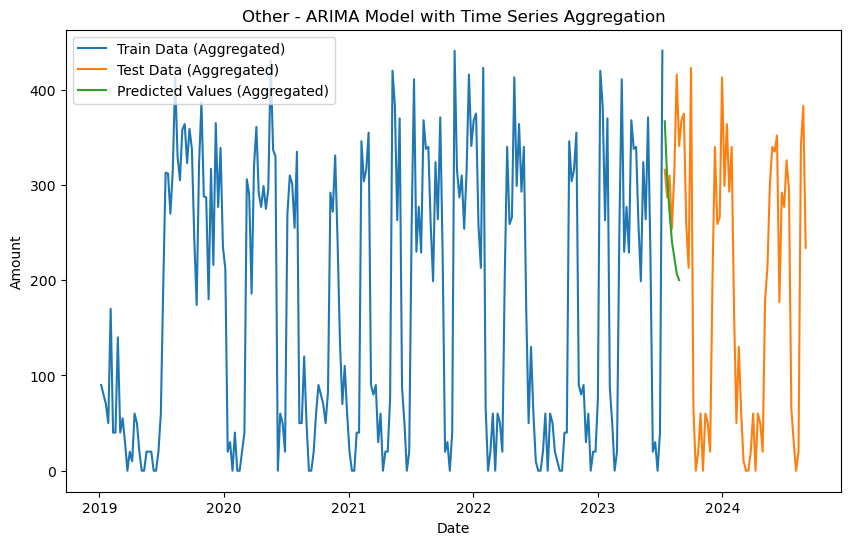

In [288]:
# Loop through each category
for category in categories:
    print(f"Training ARIMA model for category: {category}")
    
    # Perform time series aggregation
    ts_data_aggregated = df[category].resample(aggregation_frequency).sum()
    
    # Split the aggregated data into training and test sets
    train_data, test_data = train_test_split(ts_data_aggregated, test_size=0.2, shuffle=False)
    
    # Hyperparameter tuning (you may use more sophisticated methods)
    p, d, q = hyperparameters_dict[category]
    
    # Train ARIMA model
    model = ARIMA(train_data, order=(p, d, q))
    results = model.fit()
    
    # Store the trained model and best parameters
    models_dict[category] = results
    best_params_dict[category] = (p, d, q)

    # Generate forecast for the next 'forecast_steps' steps
    forecast = results.get_forecast(steps=forecast_steps)
    predicted_values = forecast.predicted_mean
    
    print(f"Predicted values for the next 7 days ({category}):")
    print(predicted_values.tail(7))
    
    # Plot the actual vs. predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train Data (Aggregated)')
    plt.plot(test_data.index, test_data, label='Test Data (Aggregated)')
    plt.plot(predicted_values.index, predicted_values, label='Predicted Values (Aggregated)')
    plt.title(f"{category} - ARIMA Model with Time Series Aggregation")
    plt.xlabel('Date')
    plt.ylabel('Amount')
    plt.legend()
    plt.show()


In [289]:
joblib.dump(models_dict, 'models_dict.pkl')
joblib.dump(best_params_dict, 'best_params_dict.pkl')

['best_params_dict.pkl']